<a href="https://colab.research.google.com/github/gjurcin/classification_TFIDF/blob/main/TF_IDF_Text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text (sentences) classification

We will develop simple classifiers that are able to detecet whether a given sentence comes from macedonian literature or from macedonian news. 

The data/cospus is already split to sentences. It is a combination of:
  1. [macedonian literature corpus](http://drmj.manu.edu.mk/%D0%B5%D0%BB%D0%B5%D0%BA%D1%82%D1%80%D0%BE%D0%BD%D1%81%D0%BA%D0%B8-%D0%BA%D0%BE%D1%80%D0%BF%D1%83%D1%81-%D0%BD%D0%B0-%D0%BC%D0%B0%D0%BA%D0%B5%D0%B4%D0%BE%D0%BD%D1%81%D0%BA%D0%B8-%D0%BA%D0%BD%D0%B8/)
  2. [SETimes – A Parallel Corpus of English and South-East European Languages](http://nlp.ffzg.hr/resources/corpora/setimes/)

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Data

First, donwload and store the data to your drive:
https:
1. Corpus: https://drive.google.com/file/d/1oh9Cc_C-0QCzXalP7BJFd-jJHjbXfvsP/view?usp=sharing
2. Macedonian stopwords:
https://drive.google.com/file/d/1HxhnoZpr_YQi2_mLcwfhDXbJnd_p6CVM/view?usp=sharing

##Load the data

In [ ]:
#mount drive (the data is already stored on drive)
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#read data from file.
path_to_data = "/content/gdrive/MyDrive/mkd_korpus/sentences_labels.pkl"
with open(path_to_data, mode = 'rb') as my_file: 
    corpus, labels = pickle.load(my_file)
    my_file.close()

len(corpus),len(labels)

(479815, 479815)

## Plot the data distribution

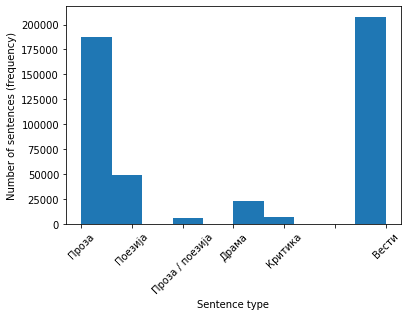

In [ ]:
#plot label distribution
plt.figsize = (15,5)
plt.hist(labels)
plt.ylabel("Number of sentences (frequency)")
plt.xlabel("Sentence type")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
np.unique(labels)

array(['', 'Вести', 'Драма', 'Критика', 'Поезија', 'Проза',
       'Проза / поезија'], dtype='<U15')

In [ ]:
#convert the labels to binary problem (literature vs. news)
binary_labels = np.array(labels)
binary_labels[binary_labels=='Проза / поезија'] = 0
binary_labels[binary_labels=='Драма'] = 0
binary_labels[binary_labels=='Критика'] = 0
binary_labels[binary_labels=='Поезија'] = 0
binary_labels[binary_labels=='Проза'] = 0
binary_labels[binary_labels==''] = 0
binary_labels[binary_labels=='Вести'] = 1
np.unique(binary_labels)

array(['0', '1'], dtype='<U15')

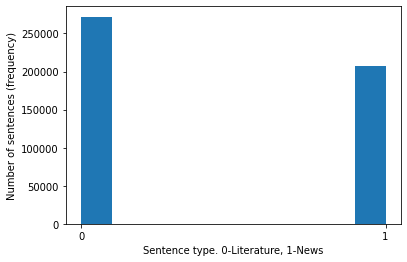

In [ ]:
#plot binary label distribution (news vs. literature)
plt.figsize = (15,5)
plt.hist(binary_labels)
plt.ylabel("Number of sentences (frequency)")
plt.xlabel("Sentence type. 0-Literature, 1-News")
plt.show()

## Clean the data

In [ ]:
import nltk, string
nltk.download('punkt')
def clean_corpus(my_corpus,mk_stopwords):
  corpus_processed = []
  counter = 0
  for sentence in my_corpus:
      counter = counter+1
      if counter % 10000==0:
        print(counter)
      #sentence lower
      sentence = sentence.lower()
      #string punct
      sentence = sentence.translate(str.maketrans('', '', string.punctuation))
      #tokenize
      tokens = nltk.word_tokenize(sentence)
      # stop-words
      tokens_stop_words = []
      for token in tokens:
        if token not in mk_stopwords:
          tokens_stop_words.append(token)
      # Lemmatization - this code works for English.
      #tokens_lemma = []
      #for token in tokens_stop_words:
        #tokens_lemma.append(wnl.lemmatize(token, get_wordnet_pos(nltk.pos_tag([token])[0][1])))

      final = ' '.join(tokens_stop_words)
      corpus_processed.extend(final)
  return corpus_processed


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#read macedonian stopwords from file.
#source https://github.com/petrushev/nlmk/tree/master/nlmk
path_to_data = "/content/gdrive/MyDrive/mkd_korpus/mk_stopwords"
with open(path_to_data, mode = 'r') as my_file: 
    mk_stopwords = my_file.read()
    my_file.close()
mk_stopwords = mk_stopwords.split('\n')[1:-1]
mk_stopwords

['беше',
 'еден',
 'едно',
 'јас',
 'рече',
 'сите',
 'сум',
 'ние',
 'сме',
 'овде',
 'исто',
 'така',
 'на',
 'и',
 'во',
 'се',
 'го',
 'не',
 'да',
 'е',
 'што',
 'од',
 'со',
 'за',
 'или',
 'тоа',
 'ја',
 'по',
 'тој',
 'но',
 'а',
 'ги',
 'до',
 'таа',
 'му',
 'кои',
 'па',
 'нив',
 'ни',
 'ќе',
 'кој',
 'итн',
 'бил',
 'кај',
 'ова',
 'врз',
 'над',
 'тие',
 'a',
 'две',
 'би',
 'она',
 'неа',
 'си',
 'кое',
 'ако',
 'два',
 'има',
 'в',
 'како',
 'само',
 'дека',
 'една',
 'туку',
 'кога',
 'сега',
 'ми',
 'потоа',
 'низ',
 'ти',
 'кон',
 'додека',
 'веќе',
 'нешто',
 'него',
 'уште',
 'таму',
 'ли',
 'под',
 'беа',
 'ме',
 'некој',
 'ништо',
 'тука',
 'пред',
 'им',
 'каде',
 'повторно',
 'ниту',
 'биде',
 'толку',
 'никогаш',
 'мене',
 'дали',
 'тогаш',
 'своите',
 'сето',
 'без',
 'нема',
 'околу',
 'многу',
 'полека',
 'секогаш',
 'зошто',
 'те',
 'добро',
 'можеби',
 'колку',
 'можеше',
 'нивните',
 'преку',
 'миг',
 'знам',
 'малку',
 'вратата',
 'ох',
 'навистина',
 'ов

In [ ]:
#clean the corpus
corpus_proc = clean_corpus(corpus,mk_stopwords)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000


In [ ]:
len(corpus_proc),len(binary_labels)

(479815, 479815)

In [ ]:
corpus_proc[0]

'дете гулабарникот дамјан фрцул украдов чивт гулаби таклаџии'

In [ ]:
corpus[0]

'Како дете од гулабарникот на Дамјан Фрцул, украдов чивт гулаби - таклаџии.'

## Split the data

In [ ]:
#the first 50% of the data have label 0 and the last 50% have label 50
#to avoid having only one label in the test data, we will randomly-shuffle the data 
from sklearn.utils import shuffle
corpus_proc, corpus,binary_labels, labels = shuffle(corpus_proc, corpus,binary_labels, labels)


In [ ]:
binary_labels[-10:]

array(['0', '0', '1', '0', '1', '1', '1', '0', '0', '0'], dtype='<U15')

In [ ]:
labels[-10:]

['Проза',
 'Драма',
 'Вести',
 'Проза',
 'Вести',
 'Вести',
 'Вести',
 'Драма',
 'Проза',
 'Проза']

In [ ]:
#split on training and test
train_ratio = .7
binary_labels = binary_labels.astype(int)

train_idx = int(len(corpus_proc)*train_ratio)
trainX, testX =corpus_proc[:train_idx], corpus_proc[train_idx:]
trainY, testY =binary_labels[:train_idx], binary_labels[train_idx:]
len(trainX), len(trainY),len(testX), len(testY)

(335870, 335870, 143945, 143945)

## CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Count Vectors as features
# create and fit a count vectorizer object 
count_vect = CountVectorizer(max_features=5000)
count_vect.fit(corpus_proc)

# transform the training and test data using count vectorizer object
trainX_vec = count_vect.transform(trainX)
testX_vec = count_vect.transform(testX)
trainX_vec.shape,testX_vec.shape

((335870, 5000), (143945, 5000))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#create an instance of the model
count_model = LogisticRegression(random_state = 7, max_iter=150)

#train the model
count_model.fit(trainX_vec, trainY)

#predict test data
pred_test = count_model.predict(testX_vec)

#print evaluation metrics 
print(classification_report(testY,pred_test))
print(confusion_matrix(testY,pred_test))
print("Test accuracy:",accuracy_score(testY, pred_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     81749
           1       0.98      0.93      0.95     62196

    accuracy                           0.96    143945
   macro avg       0.96      0.96      0.96    143945
weighted avg       0.96      0.96      0.96    143945

[[80349  1400]
 [ 4319 57877]]
Test accuracy: 0.9602695473965751


## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create and fit a TfidfVectorizer 

tfidf_vect_ngram = TfidfVectorizer(ngram_range=(1,2), max_features=5000) 
tfidf_vect_ngram.fit(corpus_proc)

# transform the training and test data using TfidfVectorizer

X_train_tfidf_ngram = tfidf_vect_ngram.transform(trainX)
X_test_tfidf_ngram = tfidf_vect_ngram.transform(testX)
X_train_tfidf_ngram.shape, X_test_tfidf_ngram.shape

((335870, 5000), (143945, 5000))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#create an instance of the model
tf_idf_model = LogisticRegression(random_state = 7, max_iter=200)

#train the model
tf_idf_model.fit(X_train_tfidf_ngram, trainY)

#predict test data
pred_test = tf_idf_model.predict(X_test_tfidf_ngram)

#print evaluation metrics 
print(classification_report(testY,pred_test))
print(confusion_matrix(testY,pred_test))
print("Test accuracy:",accuracy_score(testY, pred_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     81749
           1       0.97      0.93      0.95     62196

    accuracy                           0.96    143945
   macro avg       0.96      0.96      0.96    143945
weighted avg       0.96      0.96      0.96    143945

[[80096  1653]
 [ 4148 58048]]
Test accuracy: 0.9596998853728855


## Test on new examples

In [ ]:
print("0-Literature, 1-News")
print()
test_sentence = "Резултатите и лауреатите ќе бидат објавени после 20 декември, а за најдобрите ќе има и парични награди."
test_sentence_clean = clean_corpus([test_sentence],mk_stopwords)
print("Input:\n",test_sentence)
print("Cleaned input:\n", test_sentence_clean)
print

tf_idf_input = tfidf_vect_ngram.transform(test_sentence_clean)
print("tfidf-model prediction:",tf_idf_model.predict(tf_idf_input))

count_vec_input = count_vect.transform(test_sentence_clean)
print("count-model prediction:",count_model.predict(count_vec_input))
print()

print('------')

test_sentence = """Сега, легнувајќи во самите корени на новиот век се загледуваш во мене и ги згаснуваш една по една ѕвездите во моите очи."""

test_sentence_clean = clean_corpus([test_sentence],mk_stopwords)
print("Input:\n",test_sentence)
print("Cleaned input:\n", test_sentence_clean)

tf_idf_input = tfidf_vect_ngram.transform(test_sentence_clean)
print("tfidf-model prediction:",tf_idf_model.predict(tf_idf_input))


count_vec_input = count_vect.transform(test_sentence_clean)
print("count-model prediction:",count_model.predict(count_vec_input))

0-Literature, 1-News

Input:
 Резултатите и лауреатите ќе бидат објавени после 20 декември, а за најдобрите ќе има и парични награди.
Cleaned input:
 ['резултатите лауреатите бидат објавени 20 декември најдобрите парични награди']
tfidf-model prediction: [1]
count-model prediction: [1]

------
Input:
 Сега, легнувајќи во самите корени на новиот век се загледуваш во мене и ги згаснуваш една по една ѕвездите во моите очи.
Cleaned input:
 ['легнувајќи самите корени новиот век загледуваш згаснуваш ѕвездите моите очи']
tfidf-model prediction: [0]
count-model prediction: [0]
